# Problem Statement

Objective is to understand and process the data coming out of data engineering pipelines. The
two main tasks involved are :
1. Cleaning, sanitizing and manipulating data to get useful features out of raw fields.
2. Making sense out of the raw data to provide business insights/recommendations and to help data science team to build forecasting models on it.

# Importing libraries and loading data

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_columns', None)


In [34]:
df = pd.read_csv("delhivery_data.csv")
df.head(10)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
5,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,9,2018-09-20 06:15:58,10.403038,15.0,11.0,12.1171,1.363636,15.0,11.0,12.1171,1.363636
6,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,18,2018-09-20 05:47:29,18.045481,44.0,17.0,21.2890,2.588235,28.0,6.0,9.1719,4.666667
7,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,27,2018-09-20 05:25:58,28.061896,65.0,29.0,35.8252,2.241379,21.0,11.0,14.5362,1.909091
8,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,36,2018-09-20 05:15:56,38.939167,76.0,39.0,47.1900,1.948718,10.0,10.0,11.3648,1.000000
9,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,False,43,2018-09-20 04:49:20,43.595802,102.0,45.0,53.2334,2.266667,26.0,6.0,6.0434,4.333333


# Data Cleaning and Exploration

In [36]:
# Null entries
df.isna().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

In [37]:
# Handle missing values
c1 = np.shape(df)[0]
df.dropna(inplace=True)  # Drop rows with missing values
c2 = np.shape(df)[0]
print(  np.round(abs(c2-c1)/c1*100,2))


0.38


We see that the `source_name` and `destination_name` columns have null values.

We dropped those rows. 

These constitute of only 0.38% of total rows.

In [39]:
# Data information

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144316 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144316 non-null  object 
 1   trip_creation_time              144316 non-null  object 
 2   route_schedule_uuid             144316 non-null  object 
 3   route_type                      144316 non-null  object 
 4   trip_uuid                       144316 non-null  object 
 5   source_center                   144316 non-null  object 
 6   source_name                     144316 non-null  object 
 7   destination_center              144316 non-null  object 
 8   destination_name                144316 non-null  object 
 9   od_start_time                   144316 non-null  object 
 10  od_end_time                     144316 non-null  object 
 11  start_scan_to_end_scan          144316 non-null  float64
 12  is_cutoff       

In [45]:
# Explore the data
print(  np.round(df.describe().T,2))

                                   count    mean      std     min     25%  \
start_scan_to_end_scan          144316.0  963.70  1038.08   20.00  161.00   
cutoff_factor                   144316.0  233.56   345.25    9.00   22.00   
actual_distance_to_destination  144316.0  234.71   345.48    9.00   23.35   
actual_time                     144316.0  418.00   598.94    9.00   51.00   
osrm_time                       144316.0  214.44   308.45    6.00   27.00   
osrm_distance                   144316.0  285.55   421.72    9.01   29.90   
factor                          144316.0    2.12     1.72    0.14    1.60   
segment_actual_time             144316.0   36.18    53.52 -244.00   20.00   
segment_osrm_time               144316.0   18.50    14.77    0.00   11.00   
segment_osrm_distance           144316.0   22.82    17.87    0.00   12.05   
segment_factor                  144316.0    2.22     4.85  -23.44    1.35   

                                   50%      75%      max  
start_scan_to_en

We convert the `trip_creation_time`, trip start time (`od_start_time`) and end time
(`od_end_time`) to datetime format.

In [46]:
df["trip_creation_time"] = pd.to_datetime(df["trip_creation_time"])
df["od_start_time"] = pd.to_datetime(df["od_start_time"])
df["od_end_time"] = pd.to_datetime(df["od_end_time"])

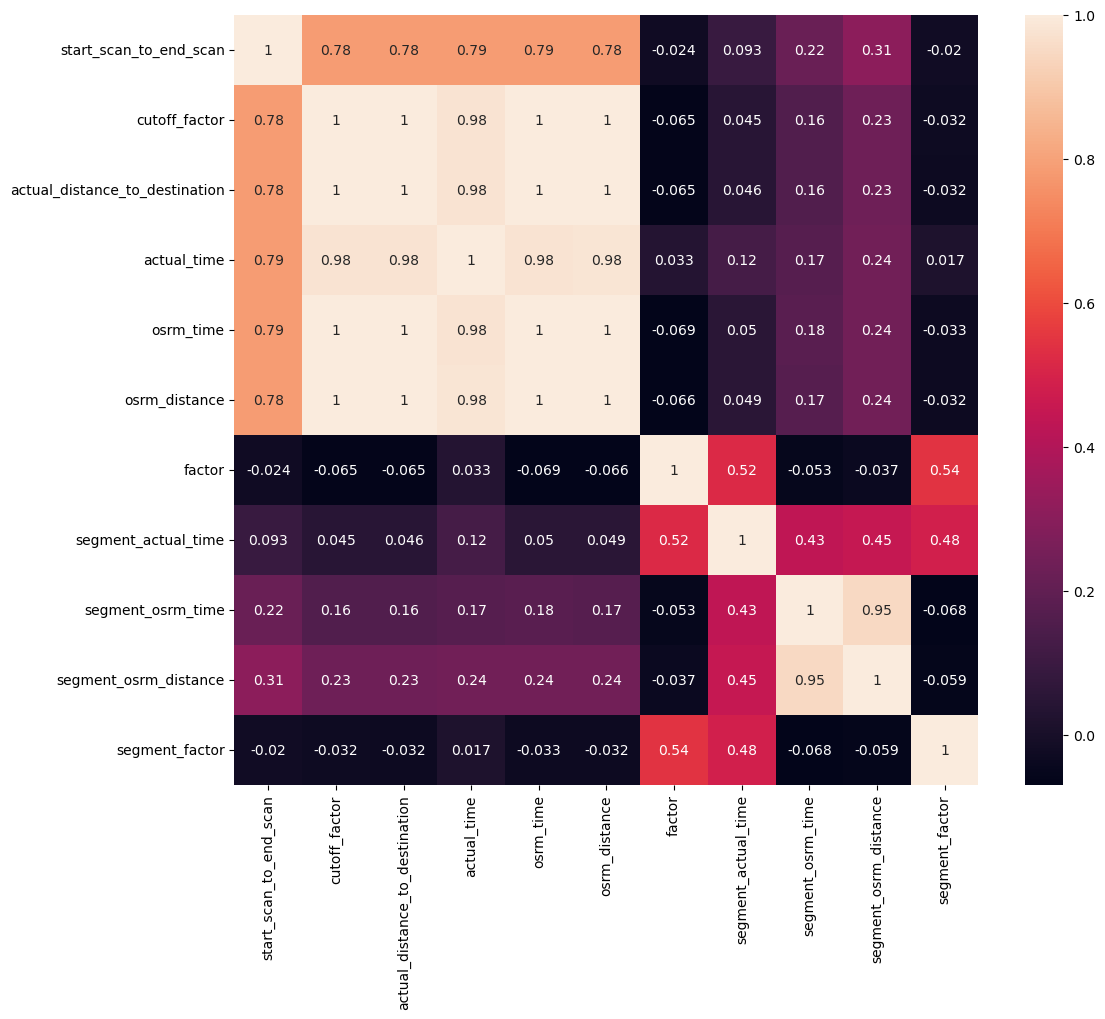

In [47]:
# Visula Analysis
numeric_columns =['start_scan_to_end_scan', 'cutoff_factor',
'actual_distance_to_destination', 'actual_time', 'osrm_time',
'osrm_distance', 'factor', 'segment_actual_time', 'segment_osrm_time',
'segment_osrm_distance', 'segment_factor']
plt.figure(figsize=(12,10))
sns.heatmap(df[numeric_columns].corr(), annot=True)
plt.show()

So we see that certain fields are highly correlated 

1. osrm_time, actual_time, osrm_distance, actual_distance_to_destination are all highly correlated to each other, which is expected because distance will effect time, and osrm calculation will be somewhat close to actual (even if not perfect).
1.  segment_osrm_time and segment_osrm_distance are also highly correlated as expected.
1.  we see poor correlation between segment_actual_time and segment_osrm_time (even though
overall actual_time and osrm_time are highly correlated).

# Feature Creation
Merging the Rows and Condensing and Further Preparing the Data

In [48]:
df['segment_key'] = df["trip_uuid"]+df["source_center"]+df["destination_center"]

segment_cols =['segment_actual_time','segment_osrm_time','segment_osrm_distance']

for col in segment_cols:
    df[col + '_sum'] = df.groupby(['segment_key'])[col].cumsum()
    
df[[col + '_sum' for col in segment_cols]]

,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,14.0,11.0,11.9653
1,24.0,20.0,21.7243
2,40.0,27.0,32.5395
3,61.0,39.0,45.5619
4,67.0,44.0,49.4772
...,...,...,...
144862,92.0,94.0,65.3487
144863,118.0,115.0,82.7212
144864,138.0,149.0,103.4265
144865,155.0,176.0,122.3150


Next we perform our first level of aggregations using `segment_key` defined above.

In [49]:
create_segment_dict = {
    'data' : 'first',
    'trip_creation_time' : 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',
    'source_center' : 'first',
    'source_name' : 'first',
    'destination_center' : 'last', #we need to take the last destination for this trip segment
    'destination_name' : 'last',
    'od_start_time' : 'first',
    'od_end_time' : 'first',
    'start_scan_to_end_scan' : 'first',
    'actual_distance_to_destination' : 'last', #since it is already cumulative
    'actual_time' : 'last', #since it is already cumulative
    'osrm_time' : 'last', #since it is already cumulative
    'osrm_distance' : 'last', #since it is already cumulative
    'segment_actual_time_sum' : 'last', #we calculated it above using cumulative sums
    'segment_osrm_time_sum' : 'last', #we calculated it above using cumulative sums
    'segment_osrm_distance_sum' : 'last' #we calculated it above using cumulative sums
}

In [50]:
segment = df.groupby(['segment_key']).agg(create_segment_dict).reset_index()
segment = segment.sort_values(by = ['segment_key','od_end_time'],ascending=True).reset_index()

In [51]:
segment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26222 entries, 0 to 26221
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   index                           26222 non-null  int64         
 1   segment_key                     26222 non-null  object        
 2   data                            26222 non-null  object        
 3   trip_creation_time              26222 non-null  datetime64[ns]
 4   route_schedule_uuid             26222 non-null  object        
 5   route_type                      26222 non-null  object        
 6   trip_uuid                       26222 non-null  object        
 7   source_center                   26222 non-null  object        
 8   source_name                     26222 non-null  object        
 9   destination_center              26222 non-null  object        
 10  destination_name                26222 non-null  object        
 11  od

We calculate time taken between `od_start_time` and `od_end_time` and keep it as a
feature.

In [53]:
segment["od_time_diff_hour"] = (segment["od_end_time"] -segment["od_start_time"]).dt.total_seconds()/(60)
segment["od_time_diff_hour"].head()

0    1260.604421
1     999.505379
2      58.832388
3     122.779486
4     834.638929
Name: od_time_diff_hour, dtype: float64

We now perform the second level of aggregations using only `trip_uuid`. This will mostly involve
summing up the individual segments for certain fields involving time and distances.

In [54]:
create_trip_dict = {
    'data' : 'first',
    'trip_creation_time' : 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',
    'source_center' : 'first',
    'source_name' : 'first',
    'destination_center' : 'last',
    'destination_name' : 'last',
    'start_scan_to_end_scan' : 'sum',
    'od_time_diff_hour' : 'sum',
    'actual_distance_to_destination' : 'sum',
    'actual_time' : 'sum',
    'osrm_time' : 'sum',
    'osrm_distance' : 'sum',
    'segment_actual_time_sum' : 'sum',
    'segment_osrm_time_sum' : 'sum',
    'segment_osrm_distance_sum' : 'sum'
}

In [55]:
trip = segment.groupby('trip_uuid').agg(create_trip_dict).reset_index(drop=True)
trip.shape

(14787, 18)

Building Features to Prepare the Data for Actual Analysis

In [56]:
#One way to extract the data would be to use regular expressions.
import re
def getstate(x):
    if x is not np.nan:
        st = re.search("\([a-zA-Z]*( \&)?( [a-zA-Z]*){0,3}\)",x)
        if st is not None:
            return st.group()[1:-1]


def getcity(x):
    if x is not np.nan:
        st = re.search("^[a-zA-Z]*(_| )?",x)
        if st is not None:
            return st.group()[:-1]

In [57]:
def place2state(x):
    state = x.split('(')[1]
    return state[:-1]


def place2city(x):
    city = x.split('(')[0]
    city=city.split('_')[0]

    #dealing with edge cases
    if city == "pnq vadgaon shei dpc" : city = "vadgaonsheri"
    if city in ["pnq pashan dpc", "pnq rahatani dpc", "pune balaji nagar"] : city = 'pune'
    if city == "hbr layout pc" : city = "bengaluru"
    if city == "bhopal mp nagar" : city = "bhopal"
    if city == "mumbai antop hill" : city = "mumbai"
    if city == "bangalore" : city = "bengaluru"
    if city == "mumbai hub " : city = "mumbai"
    return city


def place2city_place(x):
    #removing state
    x = x.split('(')[0]
    len_ = len(x.split('_'))
    if len_ >= 3:
        return x.split('_')[1]
    #small cities have same city and place name
    if len_ == 2:
        return x.split('_')[0]
    #dealing with edge cases or improper naming conventions
    return x.split(' ')[0]


def place2code(x):
    #removing state
    x = x.split('(')[0]
    if(len(x.split('_')) >=3):
        return x.split('_')[-1]
    return 'none'

In [58]:
trip["destination_state"] = trip["destination_name"].apply(lambda x:place2state(x))
trip["destination_city"] = trip["destination_name"].apply(lambda x:place2city(x))
trip["destination_place"] = trip["destination_name"].apply(lambda x:place2city_place(x))
trip["destination_code"] = trip["destination_name"].apply(lambda x:place2code(x))

trip["source_state"] = trip["source_name"].apply(lambda x: place2state(x))
trip["source_city"] = trip["source_name"].apply(lambda x: place2city(x))
trip["source_place"] = trip["source_name"].apply(lambda x: place2city_place(x))
trip["source_code"] = trip["source_name"].apply(lambda x: place2code(x))

In [59]:
trip[["destination_state","destination_city","destination_place","destination_code"]]

,destination_state,destination_city,destination_place,destination_code
0,Uttar Pradesh,Kanpur,Central,6
1,Karnataka,Doddablpur,ChikaDPP,D
2,Haryana,Gurgaon,Bilaspur,HB
3,Maharashtra,Mumbai,MiraRd,IP
4,Karnataka,Sandur,WrdN1DPP,D
...,...,...,...,...
14782,Punjab,Chandigarh,Mehmdpur,H
14783,Haryana,Faridabad,Blbgarh,DC
14784,Uttar Pradesh,Kanpur,GovndNgr,DC
14785,Tamil Nadu,Tirchchndr,Shnmgprm,D


Next we extract features from `trip_creation_time`. These features include : Year, Month, Day,
Week, DayofWeek, Hour.

In [60]:
trip["trip_creation_time"] = pd.to_datetime(trip["trip_creation_time"])
trip["trip_year"] = trip["trip_creation_time"].dt.year
trip["trip_month"] = trip["trip_creation_time"].dt.month
trip["trip_hour"] = trip["trip_creation_time"].dt.hour
trip["trip_day"] = trip["trip_creation_time"].dt.day
trip["trip_week"] = trip["trip_creation_time"].dt.isocalendar().week
trip["trip_dayofweek"] = trip["trip_creation_time"].dt.dayofweek

trip[['trip_year','trip_month','trip_hour','trip_day','trip_week','trip_dayofweek']]

,trip_year,trip_month,trip_hour,trip_day,trip_week,trip_dayofweek
0,2018,9,0,12,37,2
1,2018,9,0,12,37,2
2,2018,9,0,12,37,2
3,2018,9,0,12,37,2
4,2018,9,0,12,37,2
...,...,...,...,...,...,...
14782,2018,10,23,3,40,2
14783,2018,10,23,3,40,2
14784,2018,10,23,3,40,2
14785,2018,10,23,3,40,2


Finding, visualizing and removing outliers (using IQR) from numeric variables

In [61]:
trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14787 entries, 0 to 14786
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   data                            14787 non-null  object        
 1   trip_creation_time              14787 non-null  datetime64[ns]
 2   route_schedule_uuid             14787 non-null  object        
 3   route_type                      14787 non-null  object        
 4   trip_uuid                       14787 non-null  object        
 5   source_center                   14787 non-null  object        
 6   source_name                     14787 non-null  object        
 7   destination_center              14787 non-null  object        
 8   destination_name                14787 non-null  object        
 9   start_scan_to_end_scan          14787 non-null  float64       
 10  od_time_diff_hour               14787 non-null  float64       
 11  ac

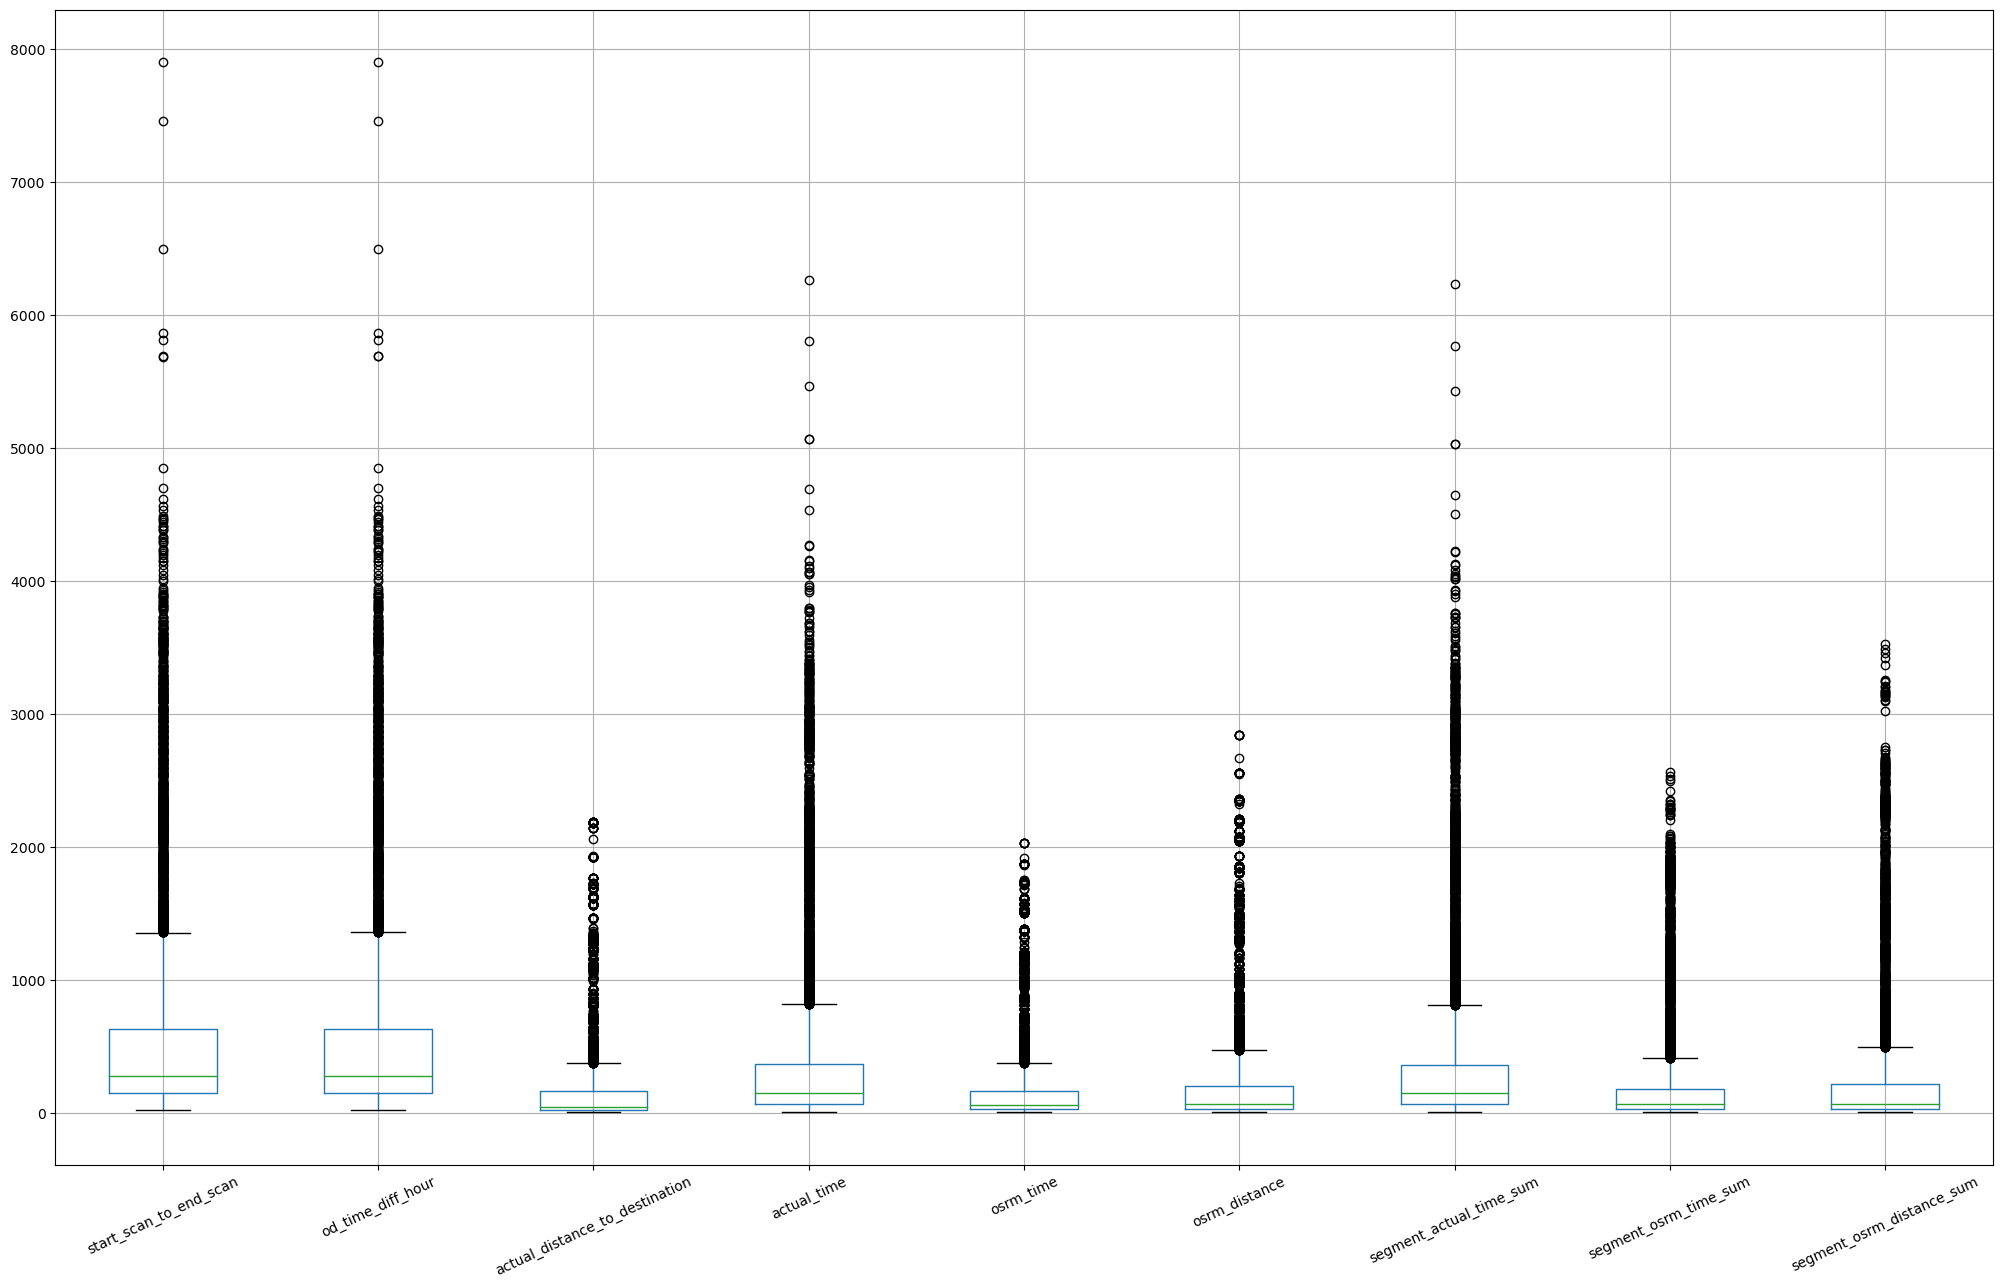

In [62]:
num_cols =['start_scan_to_end_scan','od_time_diff_hour','actual_distance_to_destination','actual_time','osrm_time',
           'osrm_distance','segment_actual_time_sum','segment_osrm_time_sum', 'segment_osrm_distance_sum']

trip[num_cols].boxplot(rot=25, figsize=(25,15))
plt.show()

In [64]:
Q1 = trip[num_cols].quantile(0.25)
Q3 = trip[num_cols].quantile(0.75)
IQR = Q3-Q1

In [65]:
trip = trip[~((trip[num_cols] < (Q1 - 1.5 * IQR))|(trip[num_cols] > (Q3 + 1.5 *IQR))).any(axis=1)]
trip = trip.reset_index(drop=True)

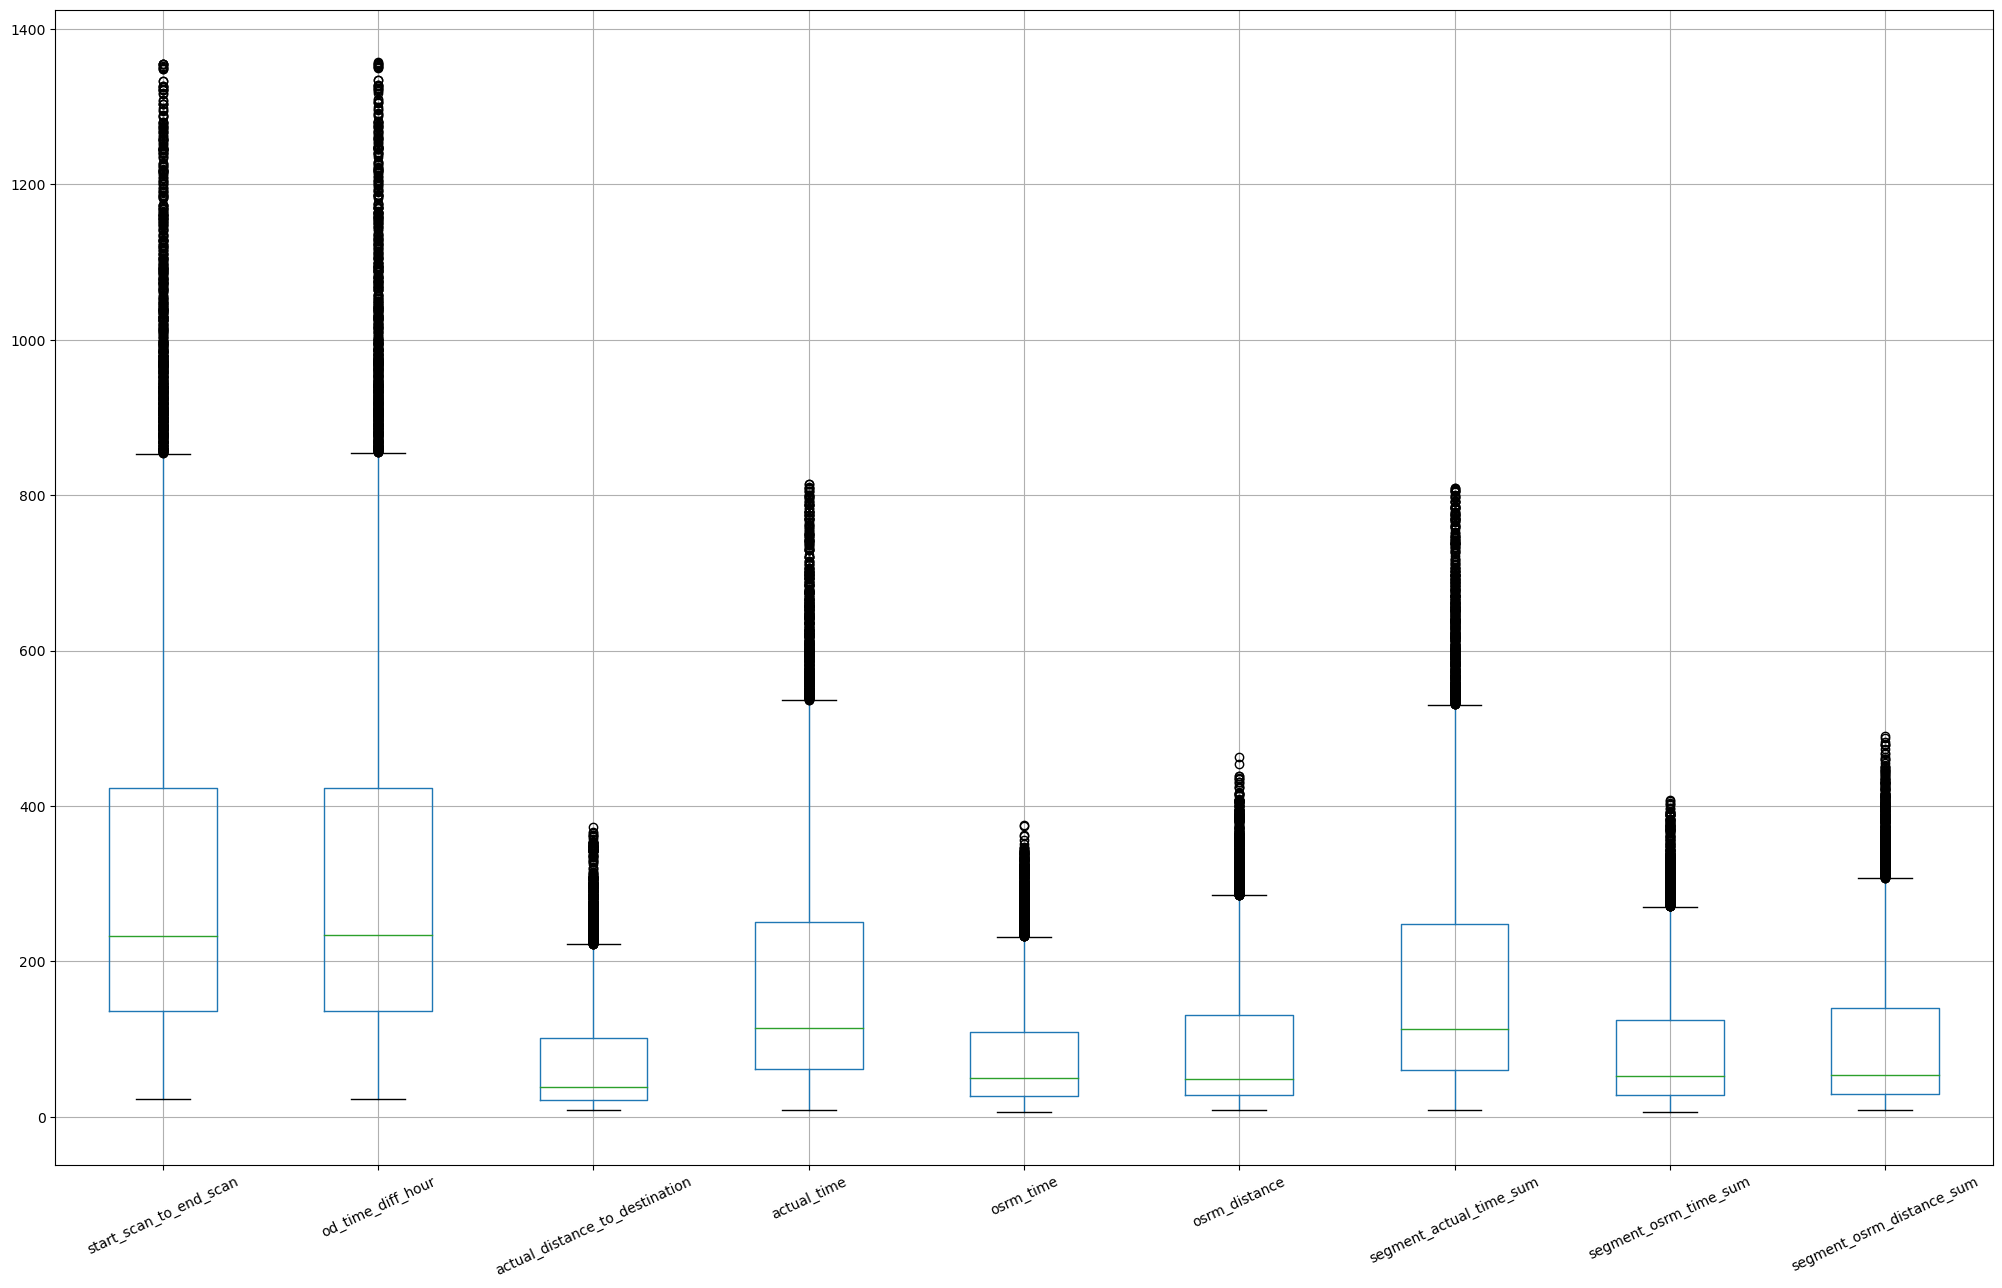

In [66]:
trip[num_cols].boxplot(rot=25, figsize=(25,15))
plt.show()

## Handling Categorical Variables
Since there are only two types of routes, we encode one of
those as 0 and the other as 1.

In [67]:
trip['route_type'].value_counts()

Carting    8812
FTL        3911
Name: route_type, dtype: int64

In [68]:
trip["route_type"] = trip["route_type"].map({'FTL':0,'Carting':1})

## More EDA on the cleaned and condensed data.
Univariate Analysis

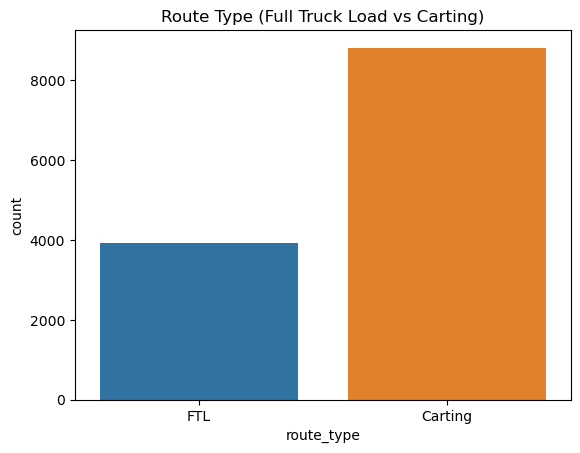

In [69]:
# Distribution of Route Types
ax = sns.countplot(x = "route_type", data = trip)
ax.set_xticklabels(["FTL","Carting"])
plt.title("Route Type (Full Truck Load vs Carting)")
plt.show()

The majority of trips (8812) involved handling systems made of small vehicles (carts).
The rest of the trips (3911) involved Full Truck Load: FTL shipments get to the destination sooner,
as the truck is making no other pickups or drop-offs along the way.

Top source and destination cities.

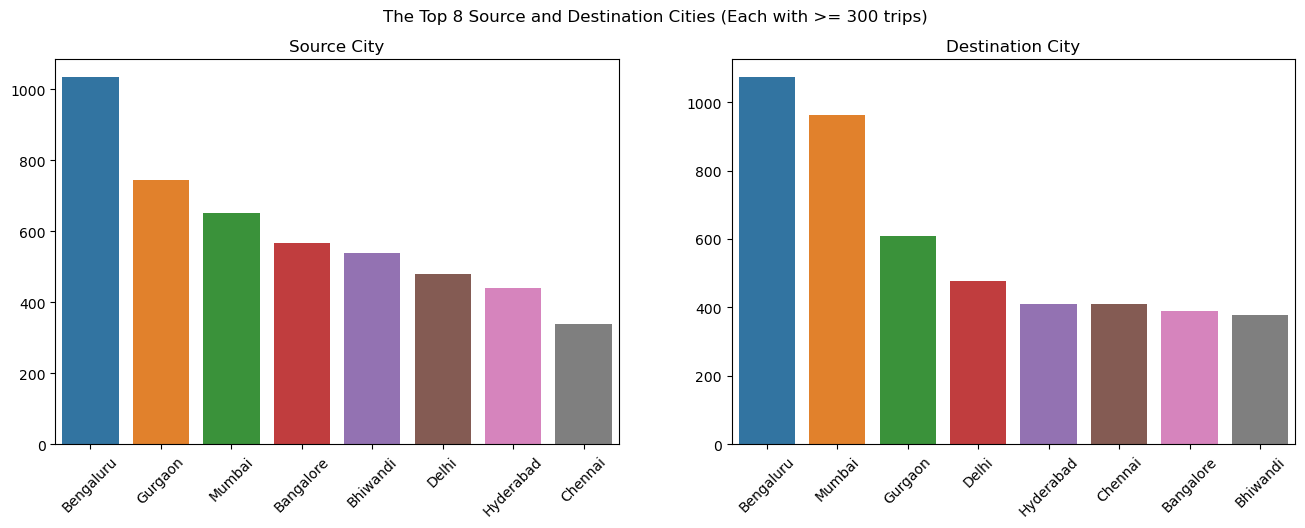

In [71]:
source300 = trip["source_city"].value_counts()[0:8]
destination300 = trip["destination_city"].value_counts()[0:8]


fig, ax = plt.subplots(1,2,figsize=(16,5))
sns.barplot(x = np.linspace(0,1,8), y = source300.values, data = source300, ax = ax[0])
ax[0].set_xticklabels(source300.index,rotation=45)
ax[0].set_title("Source City")
sns.barplot(x = np.linspace(0,1,8), y = destination300.values, data = destination300, ax = ax[1])
ax[1].set_xticklabels(destination300.index,rotation=45)
ax[1].set_title("Destination City")
plt.suptitle("The Top 8 Source and Destination Cities (Each with >= 300 trips)")
plt.show()

Top source and destination states.

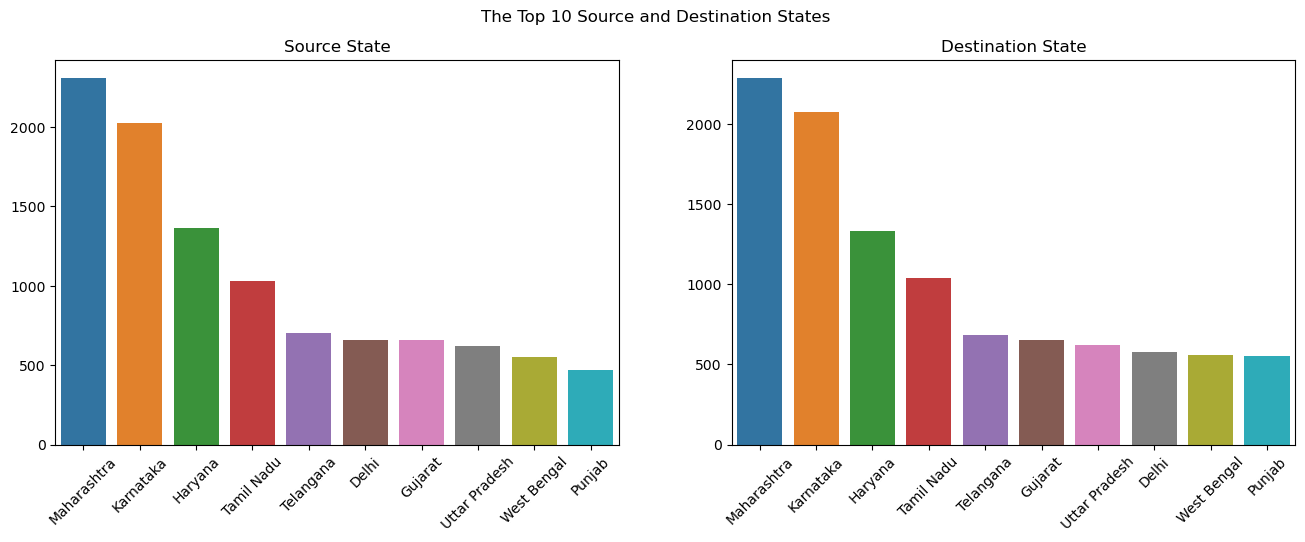

In [72]:
sourcestate10 = trip["source_state"].value_counts()[0:10]
destinationstate10 = trip["destination_state"].value_counts()[0:10]


fig, ax = plt.subplots(1,2,figsize=(16,5))
sns.barplot(x = np.linspace(0,1,10), y = sourcestate10.values, data = sourcestate10, ax = ax[0])
ax[0].set_xticklabels(sourcestate10.index,rotation=45)
ax[0].set_title("Source State")


sns.barplot(x = np.linspace(0,1,10), y = destinationstate10.values, data = destinationstate10, ax = ax[1])
ax[1].set_xticklabels(destinationstate10.index,rotation=45)
ax[1].set_title("Destination State")
plt.suptitle("The Top 10 Source and Destination States")
plt.show()

In [73]:
#Trip month
trip["trip_month"].value_counts()

9     11172
10     1551
Name: trip_month, dtype: int64

The trips are recorded only for the months of September and October. The recording perhaps
stopped after that. So we do not analyse further on the basis of month.

C:\Users\hpsub\AppData\Local\Temp\ipykernel_15708\6225078.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(trip["trip_hour"])


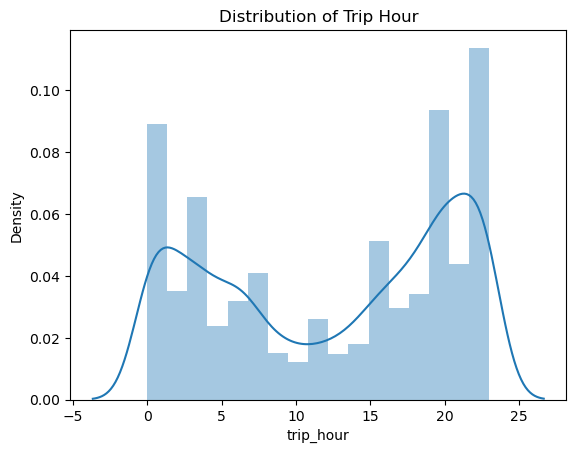

In [74]:
# Trip Hour Distribution.
sns.distplot(trip["trip_hour"])
plt.title("Distribution of Trip Hour")
plt.show()

So, we observe a kind of bimodal distribution with minimum trips occuring during the day hours
(8 AM to 1 PM) and maximum occuring during late night or early morning hours (8 PM to 2 AM).

Distribution of Actual and Calculated(OSRM) Time Taken for Trips

C:\Users\hpsub\AppData\Local\Temp\ipykernel_15708\433696542.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(trip["actual_time"], hist=False, label = "Actual Time")
C:\Users\hpsub\AppData\Local\Temp\ipykernel_15708\433696542.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplo

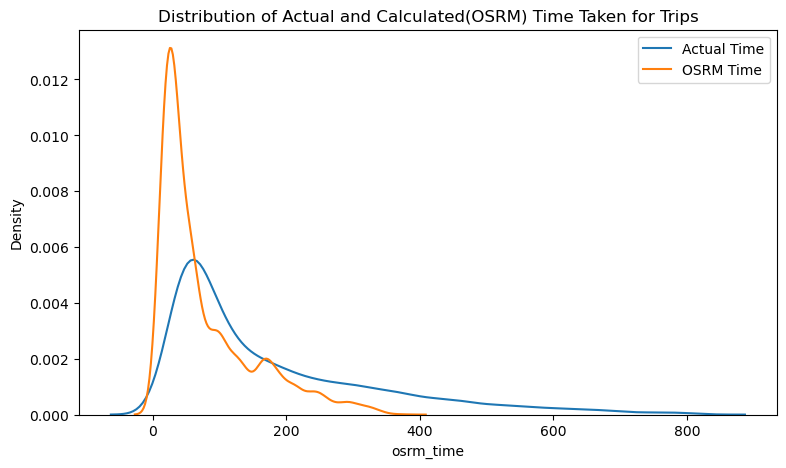

In [75]:
plt.figure(figsize=(9,5))
sns.distplot(trip["actual_time"], hist=False, label = "Actual Time")
sns.distplot(trip["osrm_time"], hist=False, label = "OSRM Time")
plt.legend()
plt.title("Distribution of Actual and Calculated(OSRM) Time Taken for Trips")
plt.show()

So we see that actual time distribution has a kind of skewed distribution. Also, OSRM seems to
be calculating time taken as less than what time it actually takes. This might be because in actual
scenario, there might be delays caused by unprecedented traffic or other delays.

Distribution of Actual and Calculated(OSRM) Distance of Trips

C:\Users\hpsub\AppData\Local\Temp\ipykernel_15708\1226644323.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(trip["actual_distance_to_destination"], hist=False, label ="Actual Distance")
C:\Users\hpsub\AppData\Local\Temp\ipykernel_15708\1226644323.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad63727

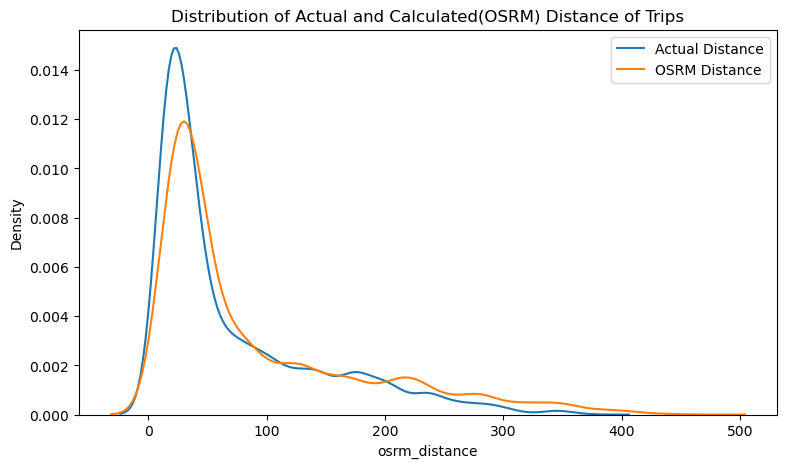

In [77]:
plt.figure(figsize=(9,5))
sns.distplot(trip["actual_distance_to_destination"], hist=False, label ="Actual Distance")
sns.distplot(trip["osrm_distance"], hist=False, label = "OSRM Distance")
plt.legend()
plt.title("Distribution of Actual and Calculated(OSRM) Distance of Trips")
plt.show()

Start Scan to End Scan vs Differnce between Trip Start and End

C:\Users\hpsub\AppData\Local\Temp\ipykernel_15708\2604918583.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(trip["start_scan_to_end_scan"], label = "Time taken to deliver from Source to Destination")
C:\Users\hpsub\AppData\Local\Temp\ipykernel_15708\2604918583.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bb

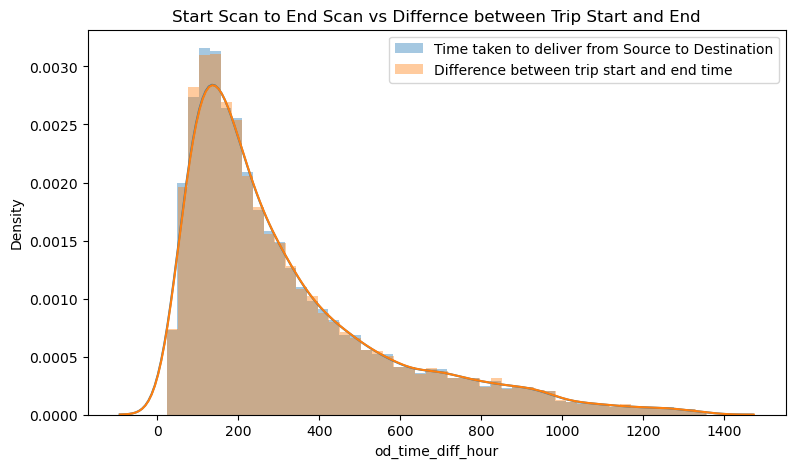

In [78]:
plt.figure(figsize=(9,5))
sns.distplot(trip["start_scan_to_end_scan"], label = "Time taken to deliver from Source to Destination")
sns.distplot(trip["od_time_diff_hour"], label = "Difference between trip start and end time")
plt.legend()
plt.title("Start Scan to End Scan vs Differnce between Trip Start and End")
plt.show()

Bivariate Analysis

Does the distribution of time taken depend on the route type (carting vs full truck
load) ?

C:\Users\hpsub\AppData\Local\Temp\ipykernel_15708\1532158454.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(trip[trip["route_type"]==0]["actual_time"], label = "FTL", ax = ax[0])
C:\Users\hpsub\AppData\Local\Temp\ipykernel_15708\1532158454.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot

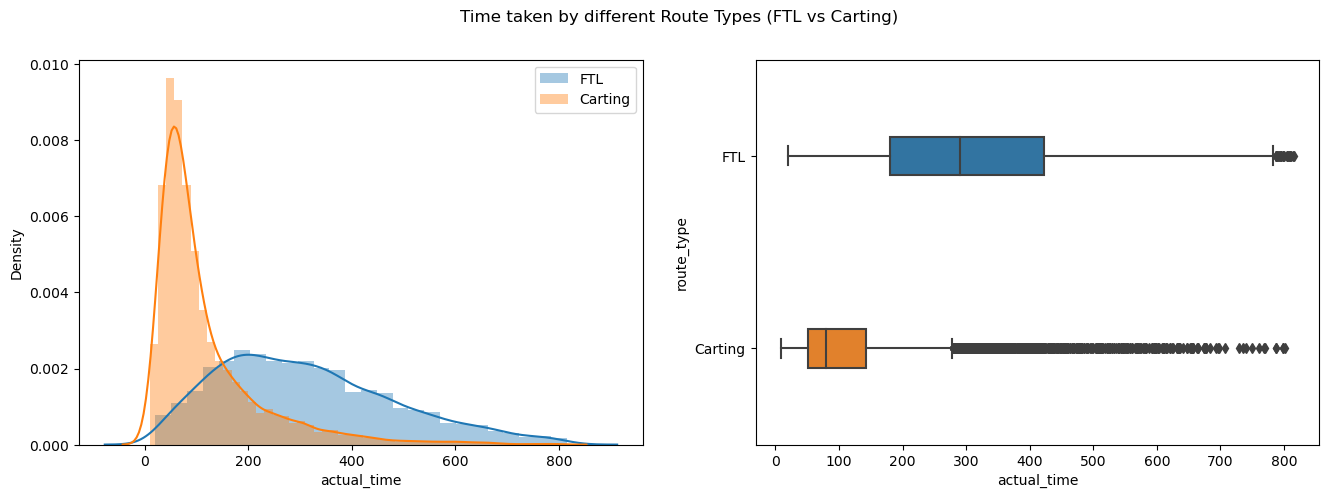

In [79]:
fig, ax = plt.subplots(1,2,figsize=(16,5))
sns.distplot(trip[trip["route_type"]==0]["actual_time"], label = "FTL", ax = ax[0])
sns.distplot(trip[trip["route_type"]==1]["actual_time"], label = "Carting", ax = ax[0])
sns.boxplot(x = "actual_time", y = "route_type", data = trip, orient='h', width=0.2, ax=ax[1])

ax[0].legend()
ax[1].set_yticklabels(["FTL","Carting"])
plt.suptitle("Time taken by different Route Types (FTL vs Carting)")
plt.show()

So we see that the time taken by full truck load deliveries is on average, a lot higher (>300 hours)
(probably because the distance covered by trucks is also much higher since they don’t make stops)
than the cart deliveries (<100 hours).

Does the distribution of distance covered depend on the route type (carting vs full
truck load) ?

C:\Users\hpsub\AppData\Local\Temp\ipykernel_15708\2313272651.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(trip[trip["route_type"]==0]["actual_distance_to_destination"], label = "FTL", ax = ax[0])
C:\Users\hpsub\AppData\Local\Temp\ipykernel_15708\2313272651.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5

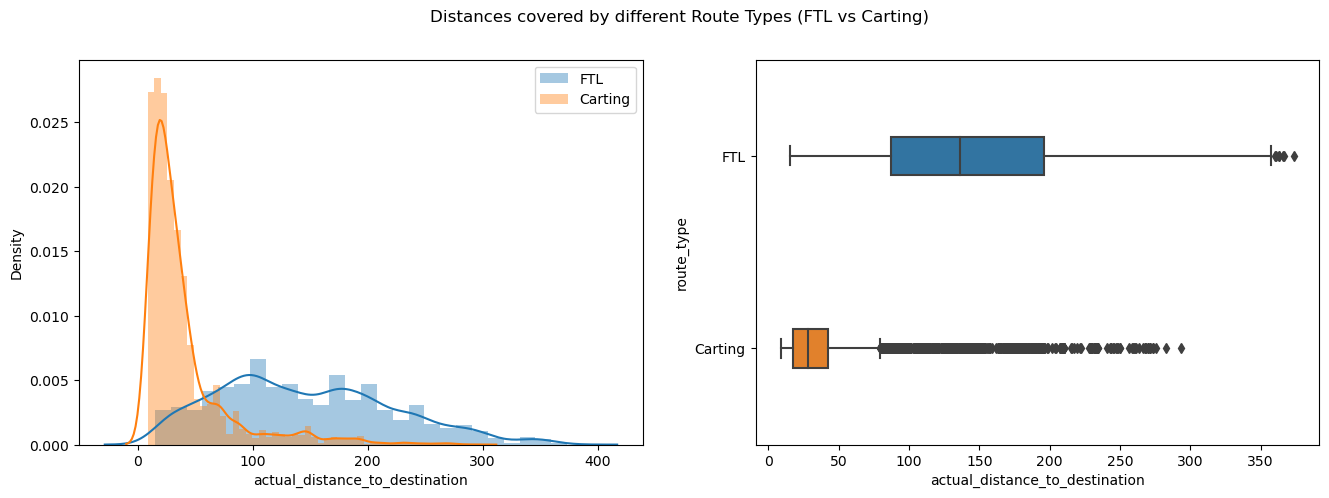

In [80]:
fig, ax = plt.subplots(1,2,figsize=(16,5))
sns.distplot(trip[trip["route_type"]==0]["actual_distance_to_destination"], label = "FTL", ax = ax[0])
sns.distplot(trip[trip["route_type"]==1]["actual_distance_to_destination"], label = "Carting", ax = ax[0])
sns.boxplot(x = "actual_distance_to_destination", y = "route_type", data = trip, orient='h', width=0.2, ax=ax[1])

ax[0].legend()
ax[1].set_yticklabels(["FTL","Carting"])
plt.suptitle("Distances covered by different Route Types (FTL vs Carting)")
plt.show()

# Hypothesis Testing

`start_scan_to_end_scan` v/s `od_time_diff_hour` 

H0 : The mean of both groups are equal.

H1: The mean are not equal.

$\alpha $ = 0.05

C:\Users\hpsub\AppData\Local\Temp\ipykernel_15708\3878285628.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(trip["start_scan_to_end_scan"], label="start_scan_to_end_scan")
C:\Users\hpsub\AppData\Local\Temp\ipykernel_15708\3878285628.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(trip["

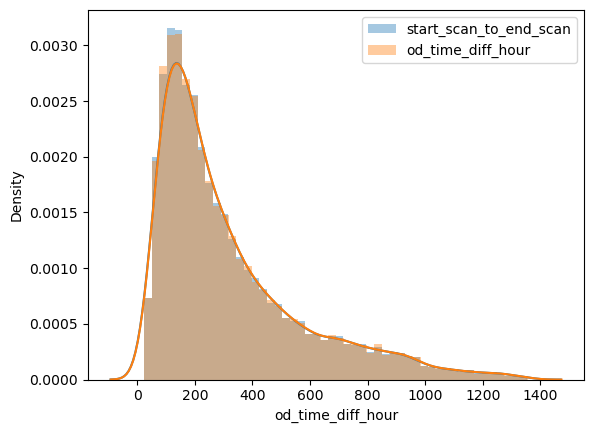

In [81]:
sns.distplot(trip["start_scan_to_end_scan"], label="start_scan_to_end_scan")
sns.distplot(trip["od_time_diff_hour"], label="od_time_diff_hour")
plt.legend()
plt.show()

From the above plot, the means indeed appear to be the same. We will perform 2-sample t-test to
find out. But first we shall convert our data to a normal distribution using boxcox transformation.

C:\Users\hpsub\AppData\Local\Temp\ipykernel_15708\322286722.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_trf1)
C:\Users\hpsub\AppData\Local\Temp\ipykernel_15708\322286722.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_trf2)


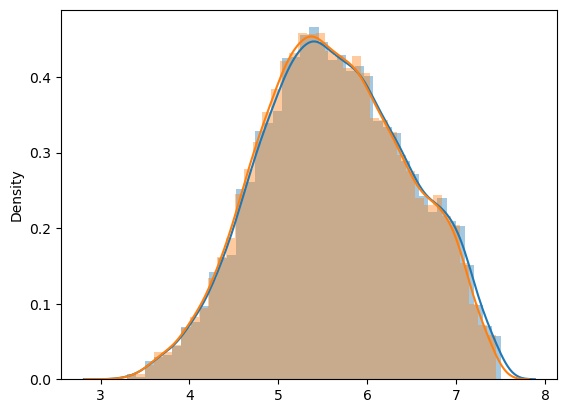

In [82]:
from scipy.stats import boxcox
x_trf1 , lambda1 = boxcox(trip["start_scan_to_end_scan"])
x_trf2 , lambda2 = boxcox(trip["od_time_diff_hour"])
sns.distplot(x_trf1)
sns.distplot(x_trf2)
plt.show()

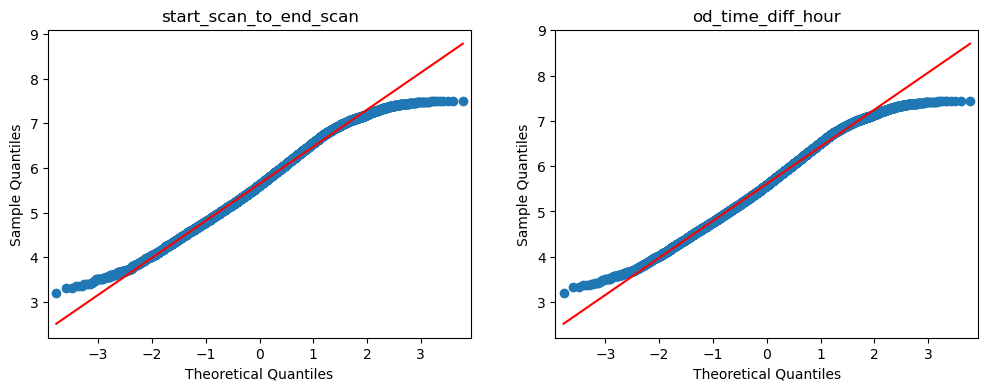

In [83]:
import statsmodels.api as sms
fig, ax = plt.subplots(1,2,figsize=(12,4))
sms.qqplot(x_trf1, line='s', ax = ax[0])
sms.qqplot(x_trf2, line='s', label='od_time_diff_hour', ax = ax[1])
ax[0].set_title('start_scan_to_end_scan')
ax[1].set_title('od_time_diff_hour')
plt.show()

Since our data is not normal even after trying BoxCox transform, we perform a non-parametric test (Mann-Whitney). Now our H0 and H1 become :

H0 : The median of both groups are equal.

H1: The median are not equal.

In [84]:
from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(trip["start_scan_to_end_scan"], trip["od_time_diff_hour"])
print(p)

0.7366629968419203


Since p > $\alpha $ (0.05), we fail to reject the null hypothesis. Hence, the sample distributions seem to
be the same for `start_scan_to_end_scan` and `od_time_diff_hour`. So, the trip duration and
the difference between trip start and end are indeed the same.

`actual_time` v/s `osrm_time` H0 : The mean of actual_time and calculated(osrm) time are equal.

H1: The mean are not equal.

$\alpha$ = 0.05

C:\Users\hpsub\AppData\Local\Temp\ipykernel_15708\694633856.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(trip["actual_time"], label="actual")
C:\Users\hpsub\AppData\Local\Temp\ipykernel_15708\694633856.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(trip["osrm_time"], label="osrm")


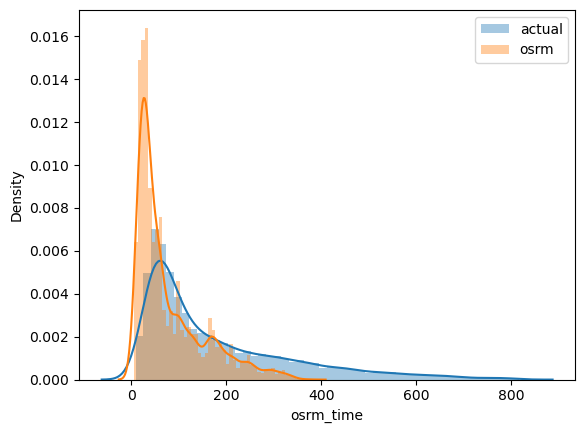

In [85]:
sns.distplot(trip["actual_time"], label="actual")
sns.distplot(trip["osrm_time"], label="osrm")
plt.legend()
plt.show()

From the plot above, it is clear that these do not follow normal distribution. So we go for the non-parametric Mann-Whitney test. Now our H0 and H1 become :

H0 : The median of both groups are equal.

H1: The median are not equal.


In [86]:
stat, p = mannwhitneyu(trip["actual_time"].sample(1000), trip["osrm_time"].sample(1000))
print(p)

1.2727090461858743e-67


Since p < $\alpha$ (0.05), we reject the null hypothesis. Hence, the sample distributions are different. So,
the actual time and th time calculated by algorithm (osrm) are very different.

# Business Insights
1. Most trips use “Carting” ($\text{~}$8K) transportation type as opposed to “FTL” ($\text{~}$4K).
2. Bengaluru, Mumbai and Gurgaon are both the top source and destination cities. Bhiwandi, Delhi, Hyderabad, Chennai, Pune and Chandigarh are also some of the top contributors. So we see that the Southern, Western and Northern corridors have the top contributing cities.
3. The top contributor states (both source and destination) are : Maharashtra is the highest, followed by Karnataka, Haryana, Tamil Nadu and Telengana, Delhi, Gujarat, UP and West Bengal. Again we see Western, Southern and Northern corridors have significant contribution to the traffic.
4. The greatest amount of time was spent in intra-state trips within Maharashtra,Karnataka, Tamil Nadu, Telengana, UP.
5. The greatest amount of distance was covered on inter-state trips in Karnaataka, Maharashtra, amil Nadu, Telengana and Andhra.
6. Similarly, the greatest amount of time was spent in intra-city trips within Bangalore, Mumbai, Hyderabad. A significant time is also spent in inter-city trips from Mumbai to Bhiwandi and Guragon to Delhi. These routes also contributed to the greatest amount of distance covered on trips.
7. Hourly distribution of number of trips in a day : minimum trips occuring during the day hours (8 AM to 1 PM) and maximum occuring during late night or early morning hours (8 PM to 2 AM).
8. OSRM seems to be calculating time taken as less than what time it actually takes. This might be because in actual scenario, there might be delays caused by unprecedented traffic or other delays.
10. OSRM seems to be calculating distance as less than what distance is actually covered. So, OSRM is underestimating time and overestimting the distance.


# Recommendations
1. Since there is significant dfference between the time and distances calculated by OSRM with actual time and distances, it might make sense to revisit the information which is fed to the routing engine for trip planning. We need to check for discrrepancies with transporters nd to check if the routing engine is configured for optimum performance.

2. We have seen that the Western, Southern and Northern corridors have significant traffic, however, not so much in Eastern, Central and North Eastern corridors. Increasing the presence in these corridors is worth investigating.
3. There is a need to plan resources (specifically during regional festivities) in the states/cities which have highest contribution to traffic.
4. Road network can be taken into consideration to increase the number of FTL deliveries inter state and to connect the states where there is lower traffic.

5. Since intra state or intra city trips are more likely to be using “carting” as mehod of transport, the number of hubs could be increased in those cities and states which have highest contribution to traffic.